In [1]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime

#Dades de connexió

usuario='EquipoB'

contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#Crear la URL de la connexió
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    #Crear el engine de SQLAlchemy
    engine=create_engine(url_conexion)
    cnx=engine.connect()

    print("conexió correcta")
    #cnx.close()
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Recordar que inspect del codi anterior quan creo la connexió amb sqlalchemy
#from sqlalchemy import create_engine, inspect
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

for taula in nombre_tablas:
    query=f"select * from {taula}"
    
    try:
        df[taula] = pd.read_sql(query, cnx)
        print(f"Taula '{taula}' carregada correctament.")
    except Exception as e:
        print(f"Error al carregar la taula '{taula}':{e}")
  
# Tancar la connexió
cnx.close()

conexió correcta
Taula 'BANK_marketing' carregada correctament.


In [3]:
df_BANK_cliente=df['BANK_marketing']

In [5]:

df_BANK_vista_cliente=df_BANK_cliente[['id','age','job','marital','education','balance','housing','loan','deposit']]

In [7]:
# Calcular la tasa de contratación por grupo demográfico
tasa_contratacion = df_BANK_vista_cliente.groupby(['age', 'job', 'marital', 'education'])[['loan', 'housing', 'deposit']].mean()
print(tasa_contratacion)


                                loan  housing   deposit
age job     marital  education                         
18  student single   primary     0.0      0.0  1.000000
                     secondary   0.0      0.0  0.000000
                     unknown     0.0      0.0  1.000000
19  student single   primary     0.0      0.0  1.000000
                     secondary   0.0      0.0  0.833333
...                              ...      ...       ...
90  retired divorced primary     0.0      0.0  1.000000
                     secondary   0.0      0.0  1.000000
92  retired married  unknown     0.0      0.0  1.000000
93  retired married  unknown     0.0      0.0  1.000000
95  retired divorced primary     0.0      0.0  1.000000

[2290 rows x 3 columns]


In [13]:
# Calcular la tasa de contratación por grupo demográfico
tasa_contratacion = df_BANK_vista_cliente.groupby(['age', 'job', 'marital', 'education'])[['loan', 'housing', 'deposit']].mean()
print(tasa_contratacion)


                                loan  housing   deposit
age job     marital  education                         
18  student single   primary     0.0      0.0  1.000000
                     secondary   0.0      0.0  0.000000
                     unknown     0.0      0.0  1.000000
19  student single   primary     0.0      0.0  1.000000
                     secondary   0.0      0.0  0.833333
...                              ...      ...       ...
90  retired divorced primary     0.0      0.0  1.000000
                     secondary   0.0      0.0  1.000000
92  retired married  unknown     0.0      0.0  1.000000
93  retired married  unknown     0.0      0.0  1.000000
95  retired divorced primary     0.0      0.0  1.000000

[2290 rows x 3 columns]


Información del DataFrame original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         11162 non-null  int64 
 1   age        11162 non-null  int64 
 2   job        11162 non-null  object
 3   marital    11162 non-null  object
 4   education  11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  int64 
 7   loan       11162 non-null  int64 
 8   deposit    11162 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 785.0+ KB
None
Tasa de Contratación:
  age_group     job   marital  education  loan  housing  deposit
0      0-25  admin.  divorced    primary   NaN      NaN      NaN
1      0-25  admin.  divorced  secondary   NaN      NaN      NaN
2      0-25  admin.  divorced   tertiary   NaN      NaN      NaN
3      0-25  admin.  divorced    unknown   NaN      NaN      NaN
4      0-25  admin.   m

C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\3094947792.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_vista_cliente['age_group'] = pd.cut(df_BANK_vista_cliente['age'], bins=bins, labels=labels)
C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\3094947792.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_contratacion = df_BANK_vista_cliente.groupby(['age_group', 'job', 'marital', 'education'])[['loan', 'housing', 'deposit']].mean().reset_index()
C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\3094947792.py:28: FutureWarning: 

Th

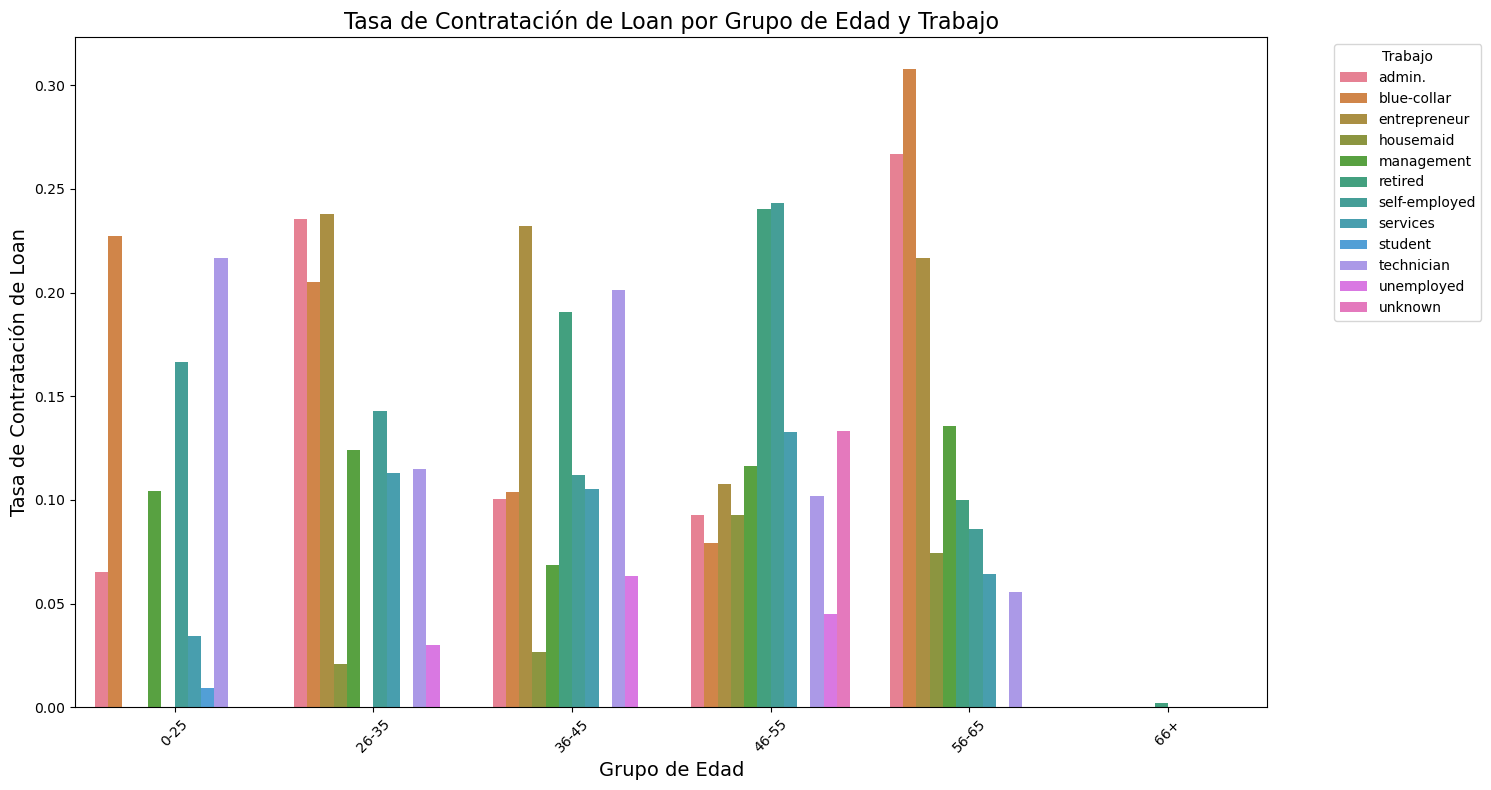

C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\3094947792.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tasa_contratacion, x='age_group', y='housing', hue='job', ci=None)


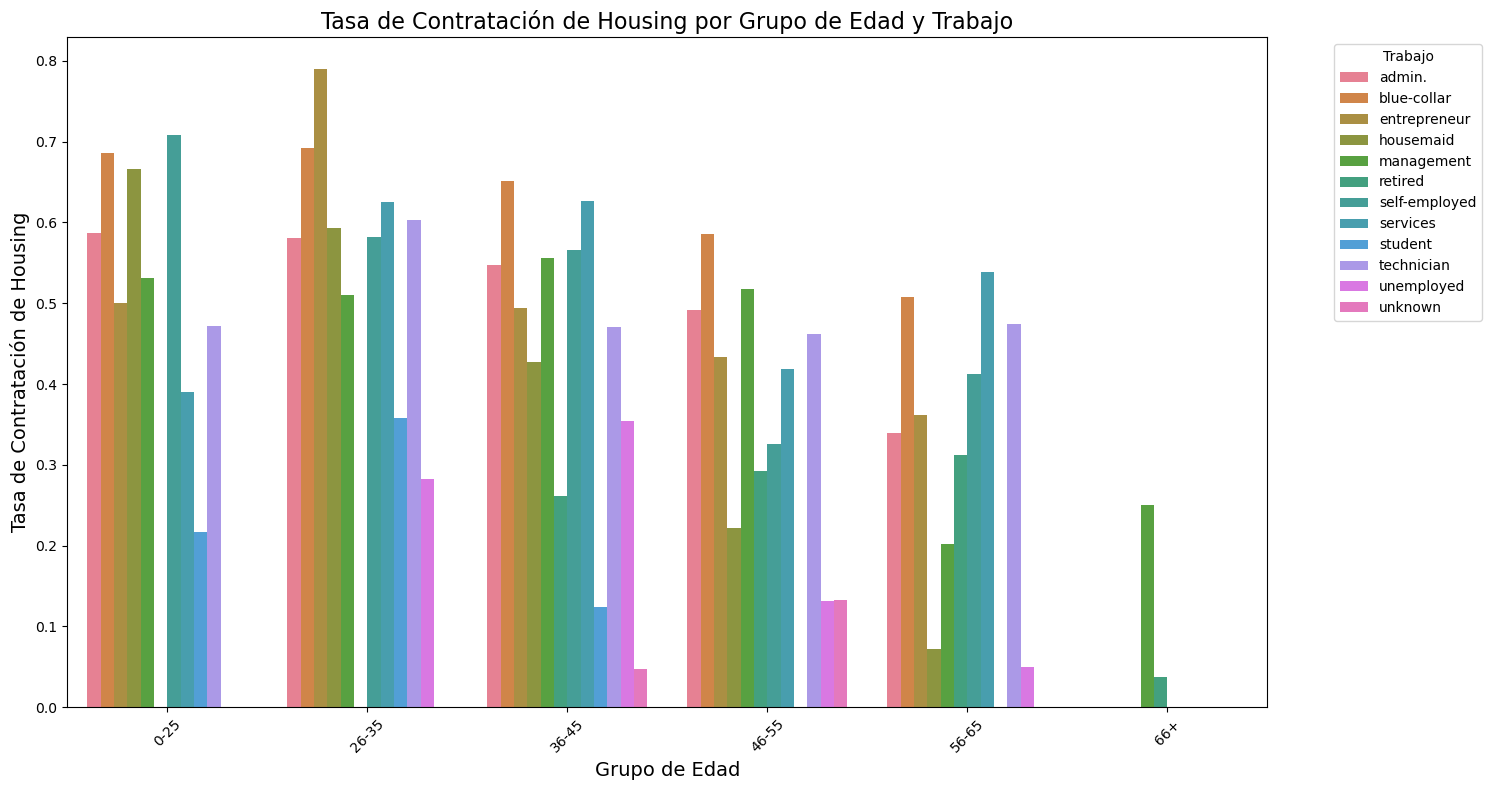

C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\3094947792.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tasa_contratacion, x='age_group', y='deposit', hue='job', ci=None)


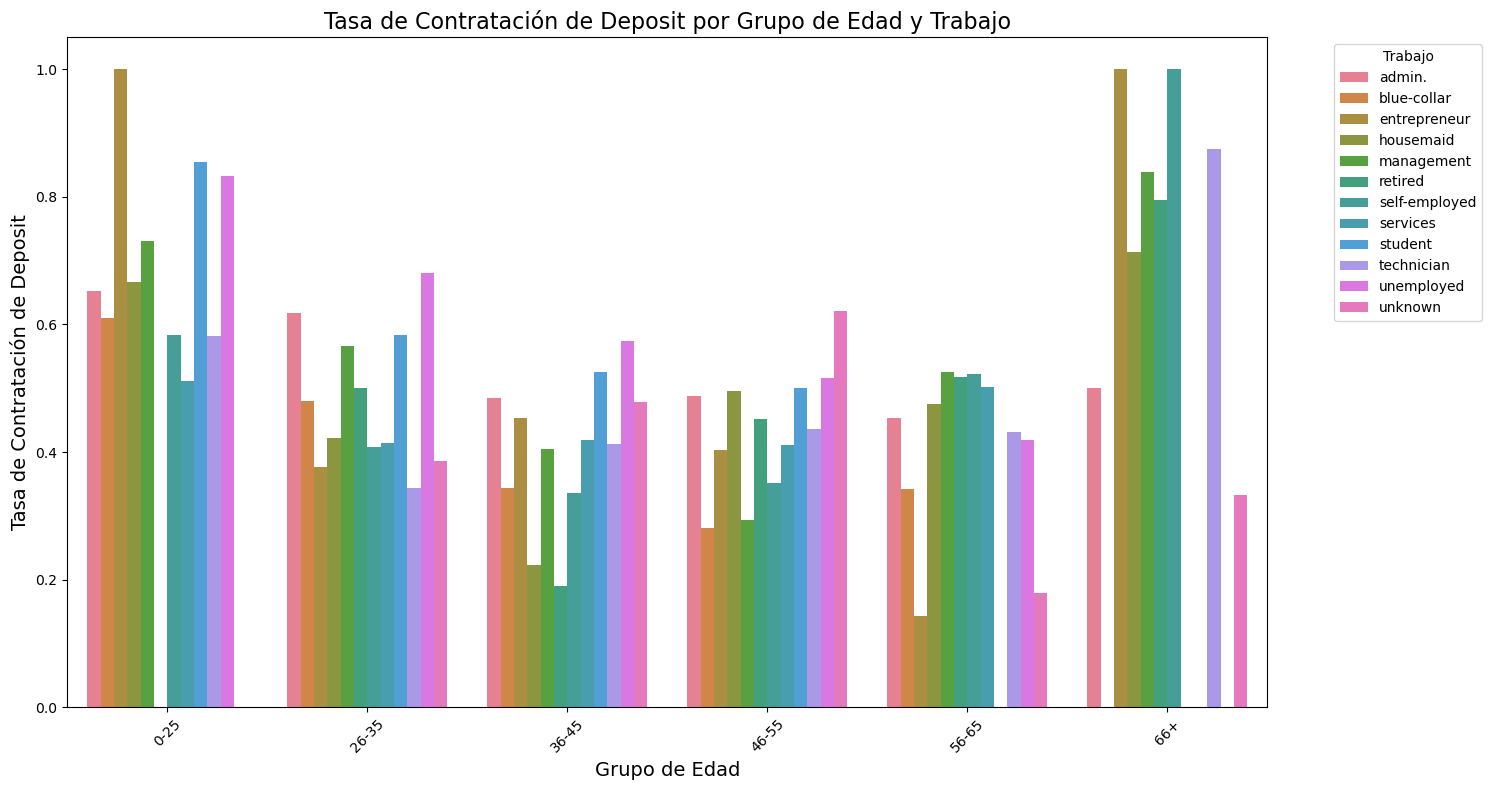

In [19]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame ya está definido y se llama df_BANK_vista_cliente
# Asegúrate de que el DataFrame está limpio (sin valores nulos)
print("Información del DataFrame original:")
print(df_BANK_vista_cliente.info())


# Agrupación de edad en intervalos
bins = [0, 25, 35, 45, 55, 65, 100]  # Definir los límites de los grupos de edad
labels = ['0-25', '26-35', '36-45', '46-55', '56-65', '66+']  # Etiquetas para los grupos de edad
df_BANK_vista_cliente['age_group'] = pd.cut(df_BANK_vista_cliente['age'], bins=bins, labels=labels)

# Calcular la tasa de contratación de productos financieros por grupo demográfico
tasa_contratacion = df_BANK_vista_cliente.groupby(['age_group', 'job', 'marital', 'education'])[['loan', 'housing', 'deposit']].mean().reset_index()

# Visualizar el nuevo DataFrame
print("Tasa de Contratación:")
print(tasa_contratacion.head())

# Configuración del tamaño del gráfico
plt.figure(figsize=(15, 8))

# Gráfico para Loan
sns.barplot(data=tasa_contratacion, x='age_group', y='loan', hue='job', ci=None)
plt.title('Tasa de Contratación de Loan por Grupo de Edad y Trabajo', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=14)
plt.ylabel('Tasa de Contratación de Loan', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Trabajo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajustar el diseño
plt.show()

# Gráfico para Housing
plt.figure(figsize=(15, 8))
sns.barplot(data=tasa_contratacion, x='age_group', y='housing', hue='job', ci=None)
plt.title('Tasa de Contratación de Housing por Grupo de Edad y Trabajo', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=14)
plt.ylabel('Tasa de Contratación de Housing', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Trabajo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Gráfico para Deposit
plt.figure(figsize=(15, 8))
sns.barplot(data=tasa_contratacion, x='age_group', y='deposit', hue='job', ci=None)
plt.title('Tasa de Contratación de Deposit por Grupo de Edad y Trabajo', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=14)
plt.ylabel('Tasa de Contratación de Deposit', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Trabajo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Información del DataFrame original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         11162 non-null  int64   
 1   age        11162 non-null  int64   
 2   job        11162 non-null  object  
 3   marital    11162 non-null  object  
 4   education  11162 non-null  object  
 5   balance    11162 non-null  int64   
 6   housing    11162 non-null  int64   
 7   loan       11162 non-null  int64   
 8   deposit    11162 non-null  int64   
 9   age_group  11162 non-null  category
dtypes: category(1), int64(6), object(3)
memory usage: 796.1+ KB
None


C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\2960294161.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_vista_cliente['age_group'] = pd.cut(df_BANK_vista_cliente['age'], bins=bins, labels=labels)
C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\2960294161.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_contratacion = df_BANK_vista_cliente.groupby([variable])[[producto]].mean().reset_index()
C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\2960294161.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` fo

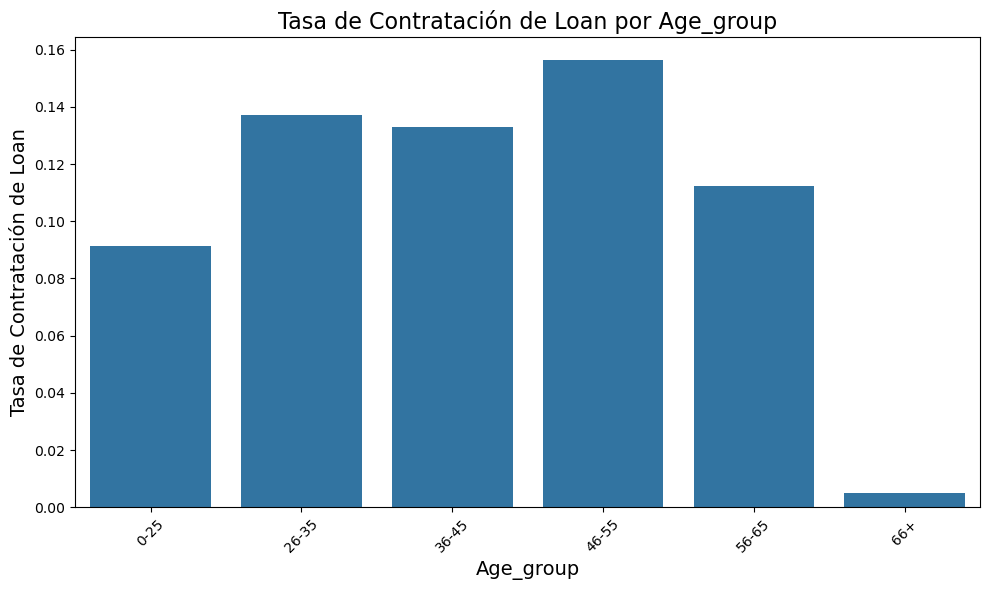

C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\2960294161.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tasa_contratacion, x=variable, y=producto, ci=None)


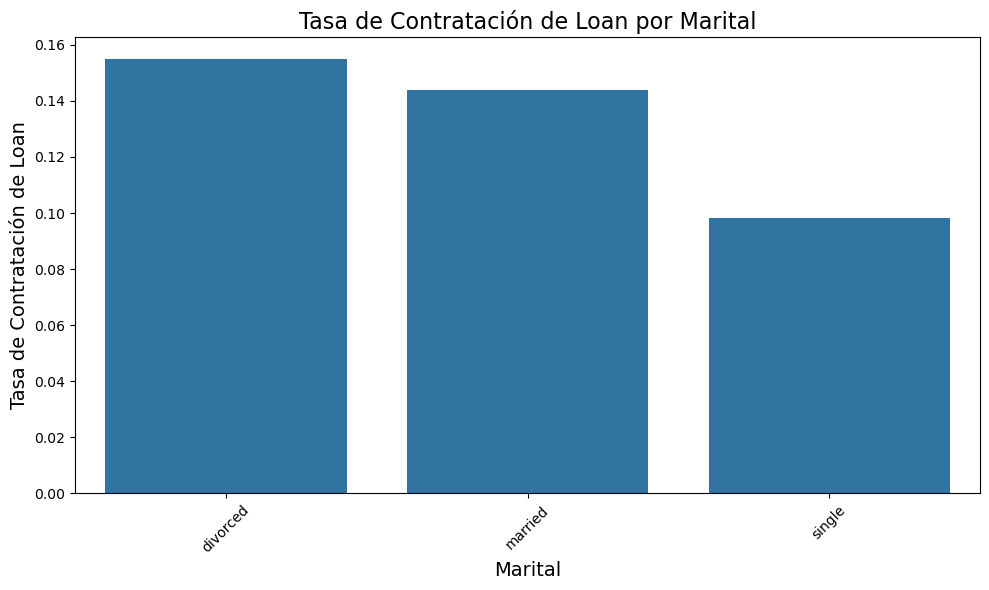

C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\2960294161.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tasa_contratacion, x=variable, y=producto, ci=None)


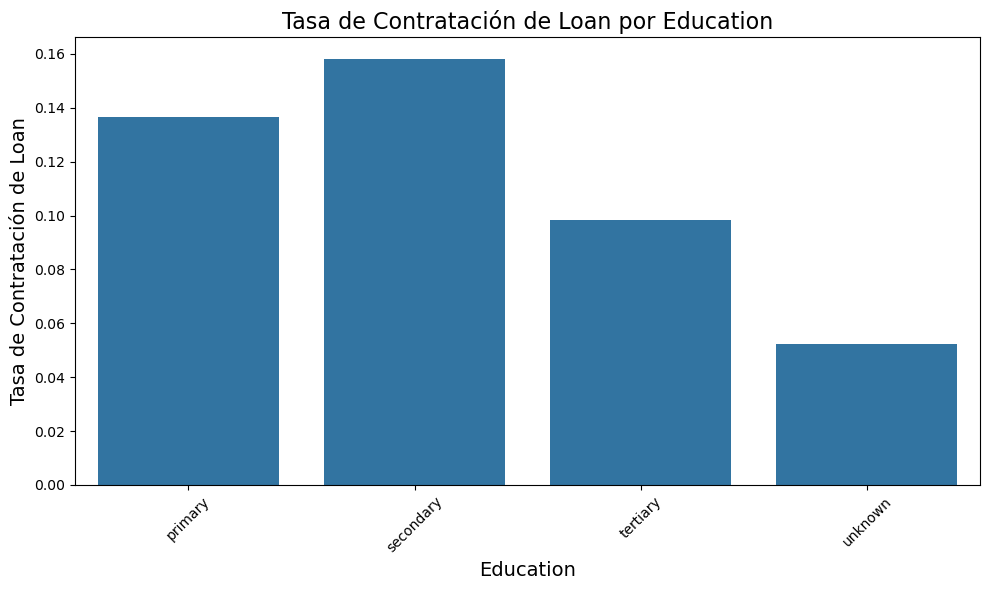

C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\2960294161.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tasa_contratacion, x=variable, y=producto, ci=None)


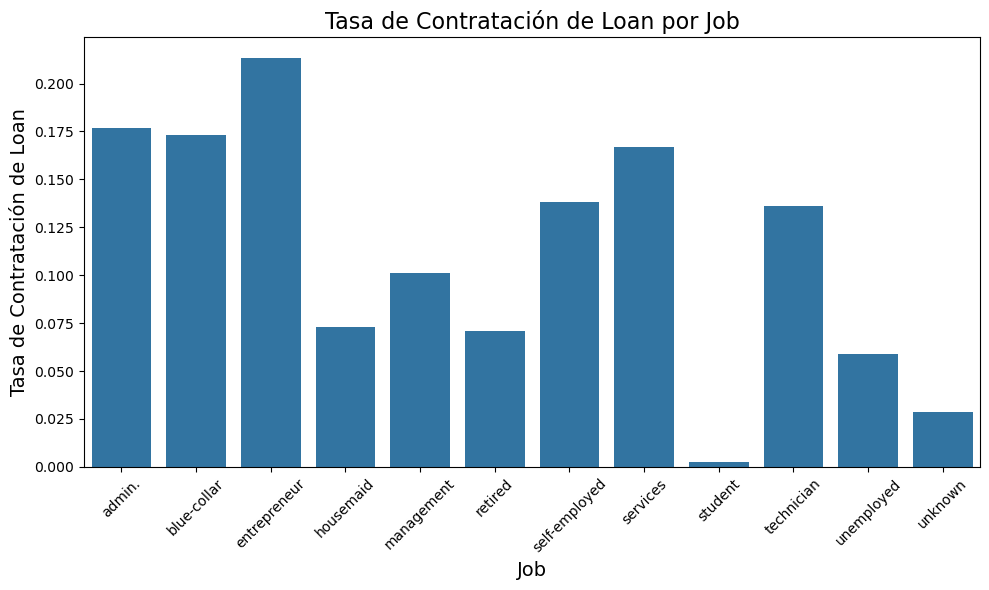

C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\2960294161.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_contratacion = df_BANK_vista_cliente.groupby([variable])[[producto]].mean().reset_index()
C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\2960294161.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tasa_contratacion, x=variable, y=producto, ci=None)


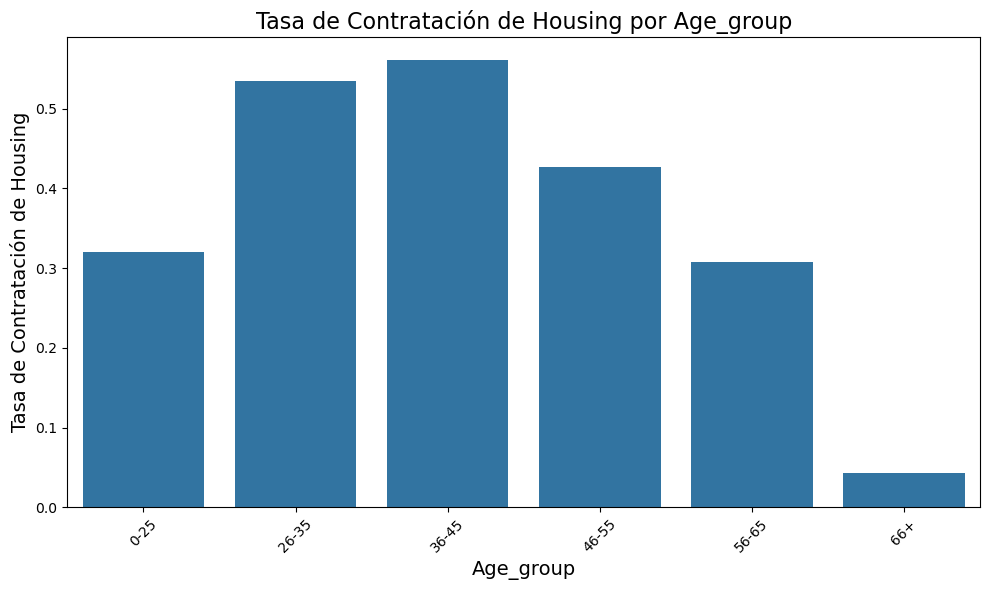

C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\2960294161.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tasa_contratacion, x=variable, y=producto, ci=None)


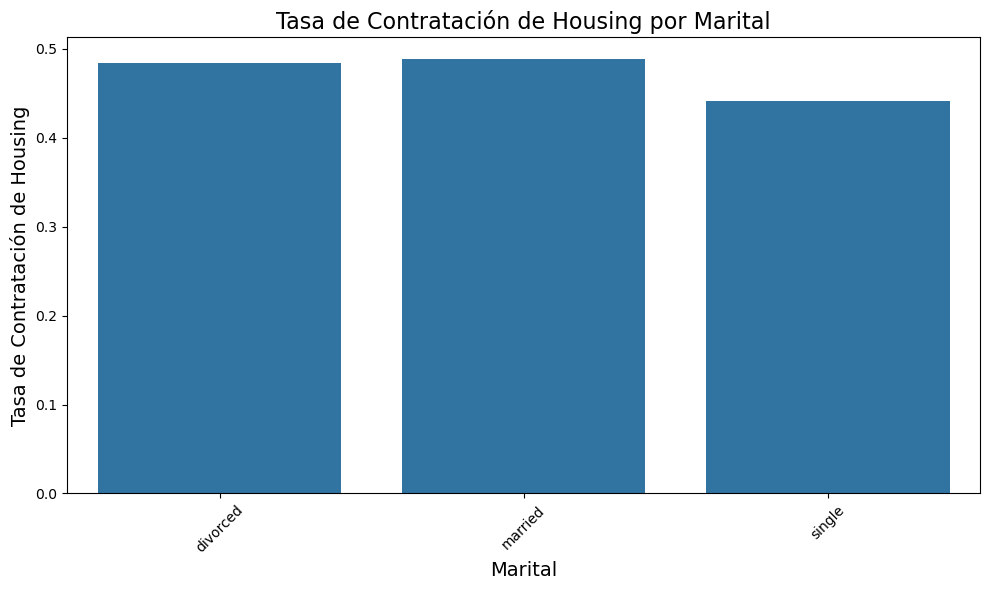

C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\2960294161.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tasa_contratacion, x=variable, y=producto, ci=None)


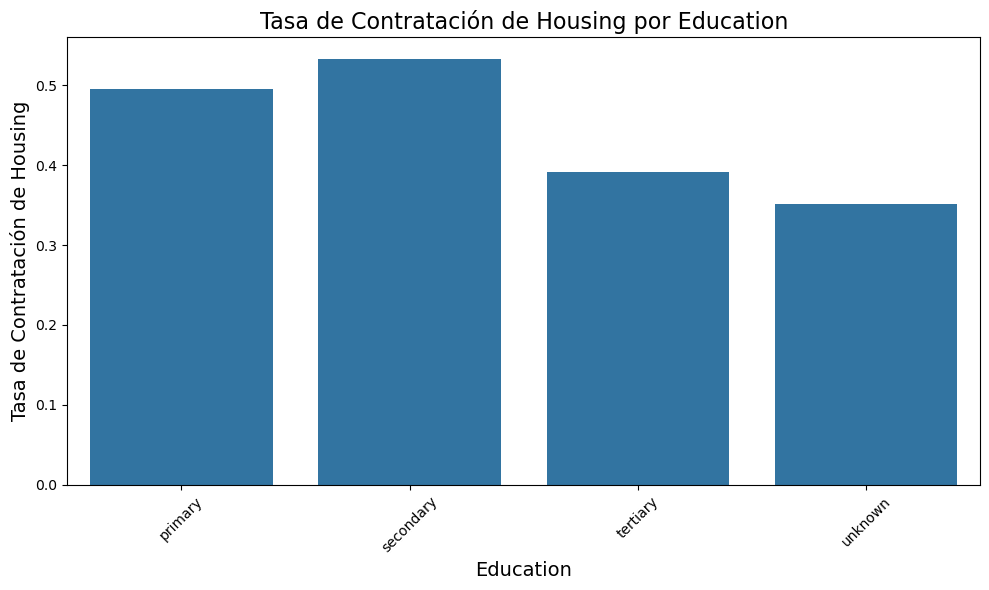

C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\2960294161.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tasa_contratacion, x=variable, y=producto, ci=None)


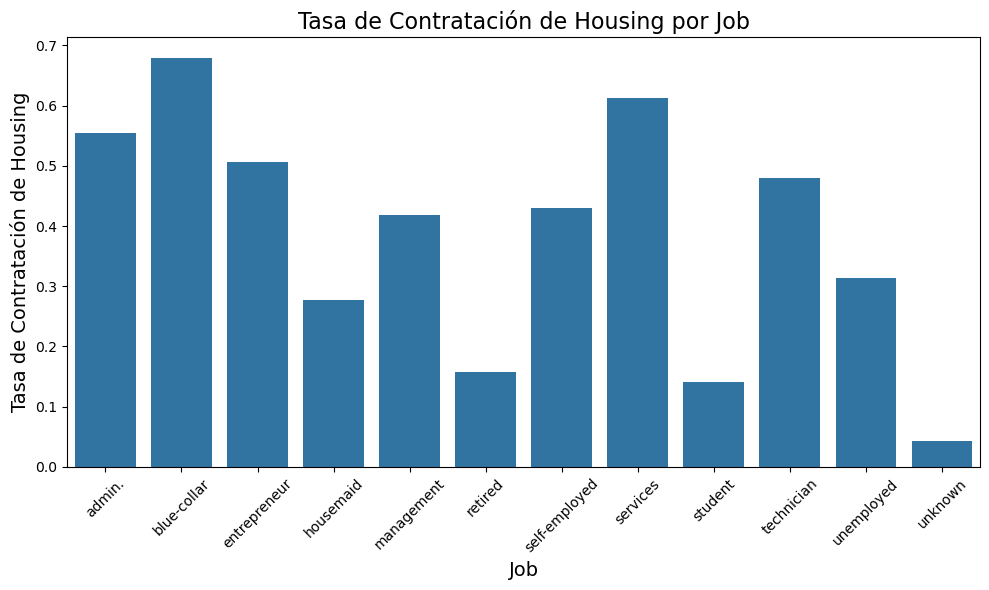

C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\2960294161.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_contratacion = df_BANK_vista_cliente.groupby([variable])[[producto]].mean().reset_index()
C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\2960294161.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tasa_contratacion, x=variable, y=producto, ci=None)


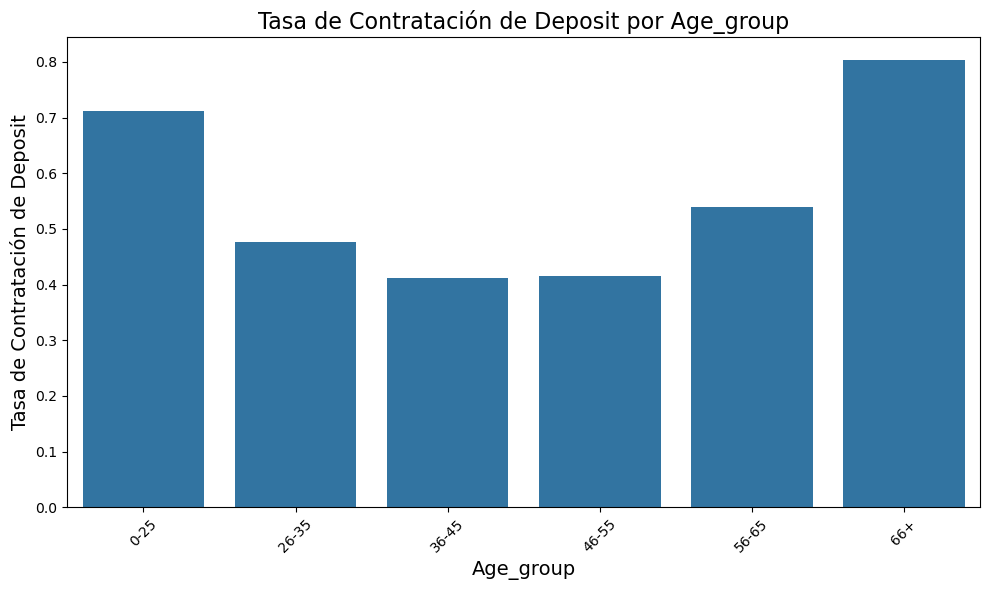

C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\2960294161.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tasa_contratacion, x=variable, y=producto, ci=None)


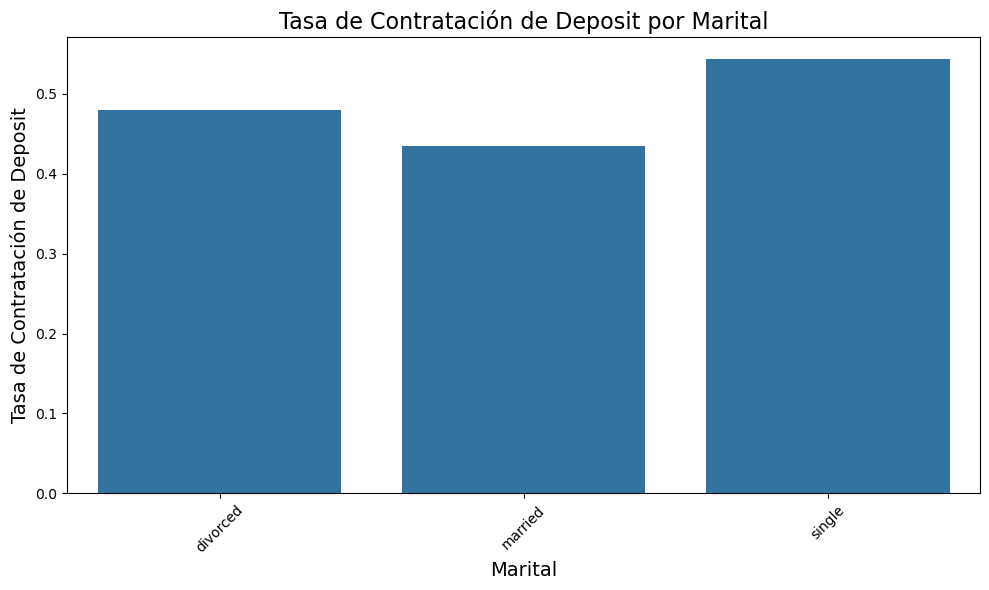

C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\2960294161.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tasa_contratacion, x=variable, y=producto, ci=None)


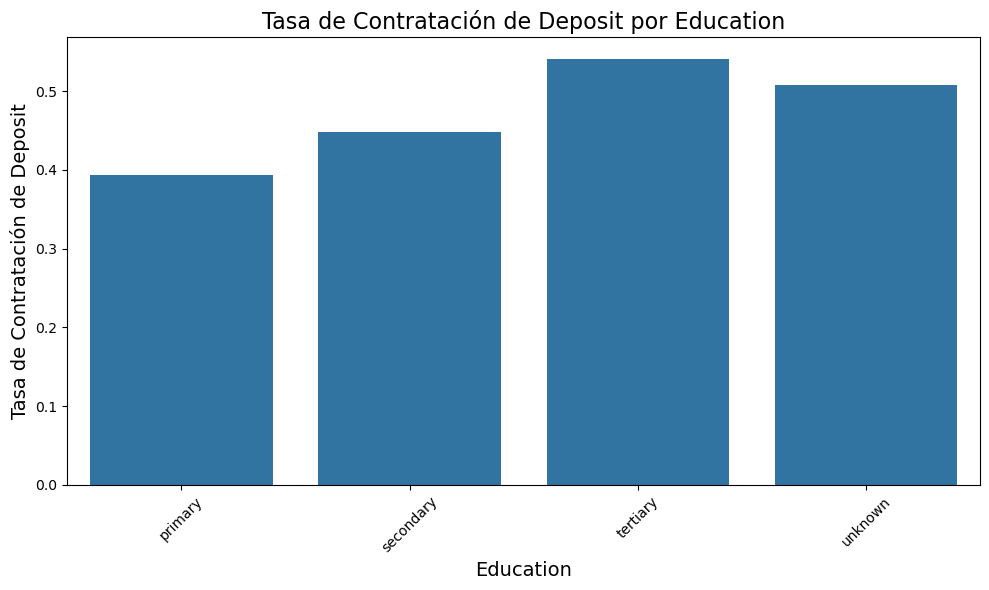

C:\Users\ereth\AppData\Local\Temp\ipykernel_18664\2960294161.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tasa_contratacion, x=variable, y=producto, ci=None)


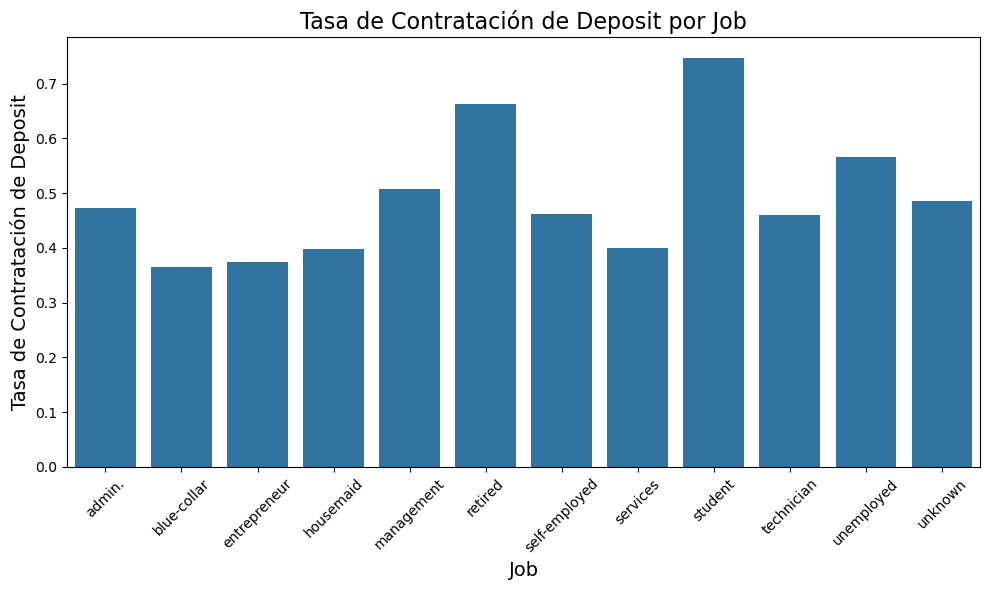

In [21]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame ya está definido y se llama df_BANK_vista_cliente
# Asegúrate de que el DataFrame está limpio (sin valores nulos)
print("Información del DataFrame original:")
print(df_BANK_vista_cliente.info())


# Agrupación de edad en intervalos
bins = [0, 25, 35, 45, 55, 65, 100]  # Definir los límites de los grupos de edad
labels = ['0-25', '26-35', '36-45', '46-55', '56-65', '66+']  # Etiquetas para los grupos de edad
df_BANK_vista_cliente['age_group'] = pd.cut(df_BANK_vista_cliente['age'], bins=bins, labels=labels)

# Definir una función para calcular y graficar la tasa de contratación
def plot_tasa_contratacion(variable, producto):
    tasa_contratacion = df_BANK_vista_cliente.groupby([variable])[[producto]].mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=tasa_contratacion, x=variable, y=producto, ci=None)
    plt.title(f'Tasa de Contratación de {producto.capitalize()} por {variable.capitalize()}', fontsize=16)
    plt.xlabel(variable.capitalize(), fontsize=14)
    plt.ylabel(f'Tasa de Contratación de {producto.capitalize()}', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()  # Ajustar el diseño
    plt.show()

# Graficar tasas de contratación para Loan
plot_tasa_contratacion('age_group', 'loan')
plot_tasa_contratacion('marital', 'loan')
plot_tasa_contratacion('education', 'loan')
plot_tasa_contratacion('job', 'loan')

# Graficar tasas de contratación para Housing
plot_tasa_contratacion('age_group', 'housing')
plot_tasa_contratacion('marital', 'housing')
plot_tasa_contratacion('education', 'housing')
plot_tasa_contratacion('job', 'housing')

# Graficar tasas de contratación para Deposit
plot_tasa_contratacion('age_group', 'deposit')
plot_tasa_contratacion('marital', 'deposit')
plot_tasa_contratacion('education', 'deposit')
plot_tasa_contratacion('job', 'deposit')
